In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading and displaying the dataset

df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Understanding the data

In [3]:
# number of rows and columns in the dataset

df.shape

(418, 12)

In [4]:
# datatypes of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# Statistical description of numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [6]:
# Description of object columns

df.describe(include = object).T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


# Data Cleaning

In [7]:
# Checking for duplicates

df.duplicated().sum()

0

# Analysis

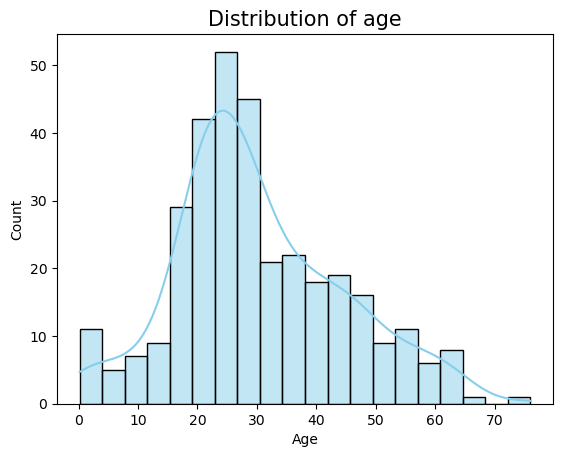

In [8]:
# Histogram of age

sns.histplot(data = df, x = "Age", kde = True, color = "skyblue", bins = 20)
plt.title("Distribution of age", fontsize = 15)
plt.show()

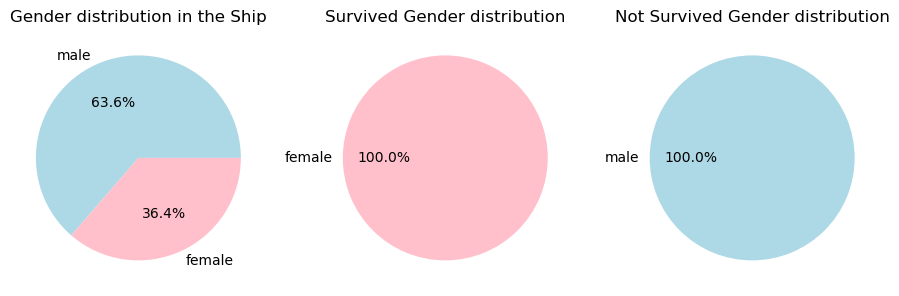

In [9]:
# pie chart showing males and females

plt.subplot(1,3,1)

total_males_females = df['Sex'].value_counts()
total_males_females.plot(kind = 'pie',  autopct='%1.1f%%', colors = ['lightblue', 'pink'], figsize = (9,9))
plt.title("Gender distribution in the Ship", fontsize = 12)
plt.ylabel("")

plt.subplot(1,3,2)

survived_males_females = df.loc[df['Survived'] == 1]['Sex'].value_counts()
survived_males_females.plot(kind = 'pie',  autopct='%1.1f%%', colors =  ['pink'], figsize = (9,9))
plt.title("Survived Gender distribution", fontsize = 12)
plt.ylabel("")

plt.subplot(1,3,3)

dead_males_females = df.loc[df['Survived'] == 0]['Sex'].value_counts()
dead_males_females.plot(kind = 'pie',  autopct='%1.1f%%', colors =  ['lightblue'], figsize = (9,9))
plt.title("Not Survived Gender distribution", fontsize = 12)
plt.ylabel("")

plt.tight_layout()
plt.show()

In [10]:
print(df.loc[(df['Survived'] == 0) & (df['Sex'] == "female")])  # return the datasets of dead females
print(df.loc[(df['Survived'] == 1) & (df['Sex'] == "male")])    # return the datasets of alive males

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


### This dataset shows that all the females in the ship have survived whereas all the males in the ship have died. Hence the data is incorrect. 
### So lets predict without using gender :

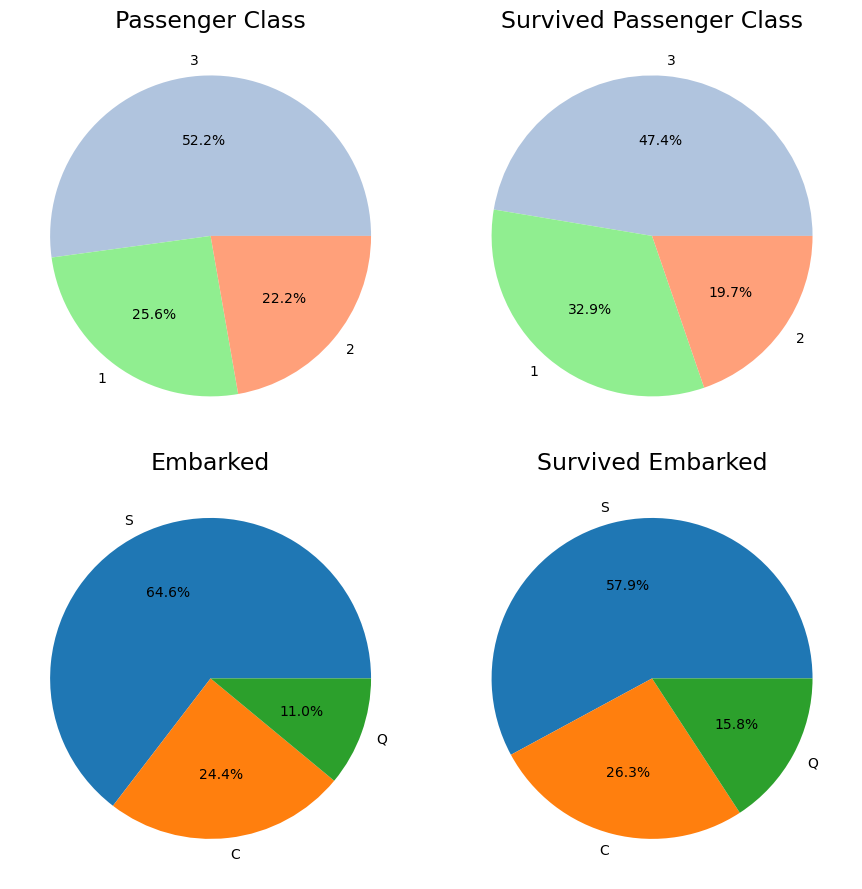

In [11]:
# Pie chart showing passenger classes and embarked

plt.figure(figsize=(9, 9))

# First subplot: Total Passenger Class
plt.subplot(2,2,1) 
passenger_class = df['Pclass'].value_counts()
passenger_class.plot(kind = 'pie',  autopct='%1.1f%%', colors = ['lightsteelblue', 'lightgreen', 'lightsalmon'])
plt.title("Passenger Class", fontsize = 17)
plt.ylabel("")

# Second subplot: Survived Passenger Class
plt.subplot(2,2,2) 
survived_passenger_class = df.loc[df['Survived'] == 1]['Pclass'].value_counts()
survived_passenger_class.plot(kind = 'pie',  autopct='%1.1f%%', colors = ['lightsteelblue', 'lightgreen', 'lightsalmon'])
plt.title("Survived Passenger Class", fontsize = 17)
plt.ylabel("")

# Third subplot: Total Embarked
plt.subplot(2,2,3)
embarked = df['Embarked'].value_counts()
embarked.plot(kind = 'pie',  autopct='%1.1f%%')
plt.title("Embarked", fontsize = 17)
plt.ylabel("")

# Fourth subplot: Survived Embarked
plt.subplot(2,2,4)
survived_embarked = df.loc[df['Survived'] == 1]['Embarked'].value_counts()
survived_embarked.plot(kind = 'pie',  autopct='%1.1f%%')
plt.title("Survived Embarked", fontsize = 17)
plt.ylabel("")


plt.tight_layout()
plt.show()


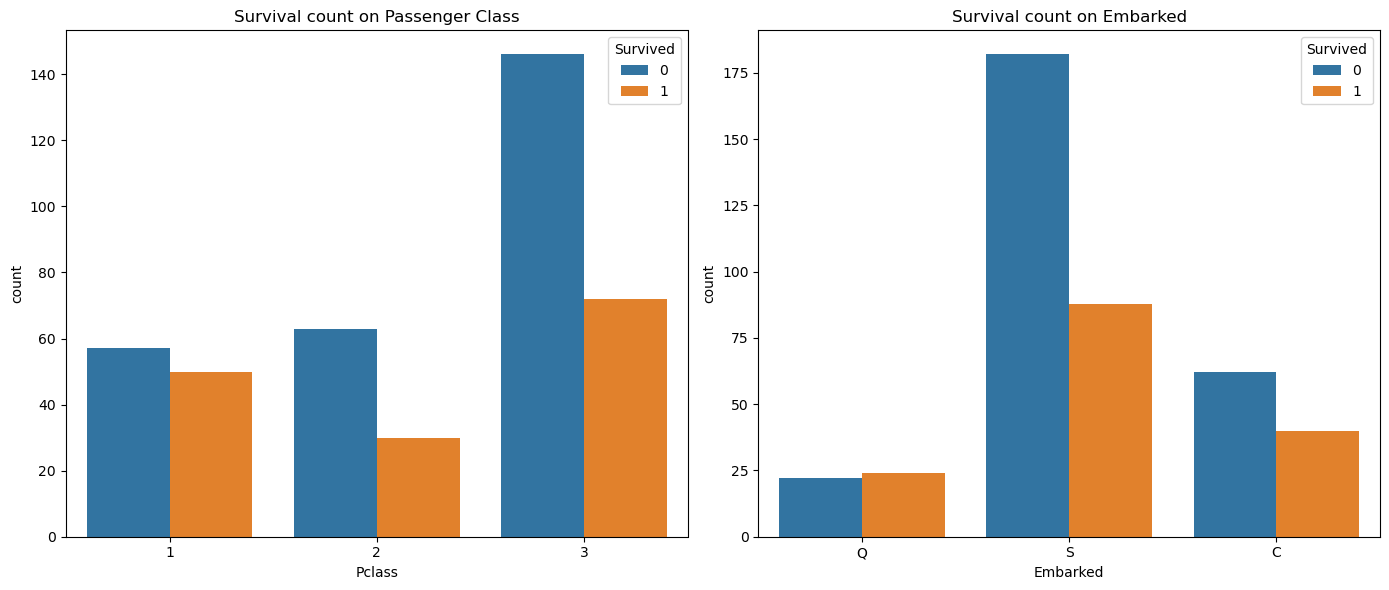

In [12]:
# Bar graphs showing survival count on passenger class and embarked

plt.figure(figsize=(14, 6))

# First subplot: Survival count by Passenger Class
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = "Pclass", hue = "Survived")
plt.title("Survival count on Passenger Class")

# Second subplot: Survival count by Embarked
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = "Embarked", hue = "Survived")
plt.title("Survival count on Embarked")

plt.tight_layout()
plt.show()

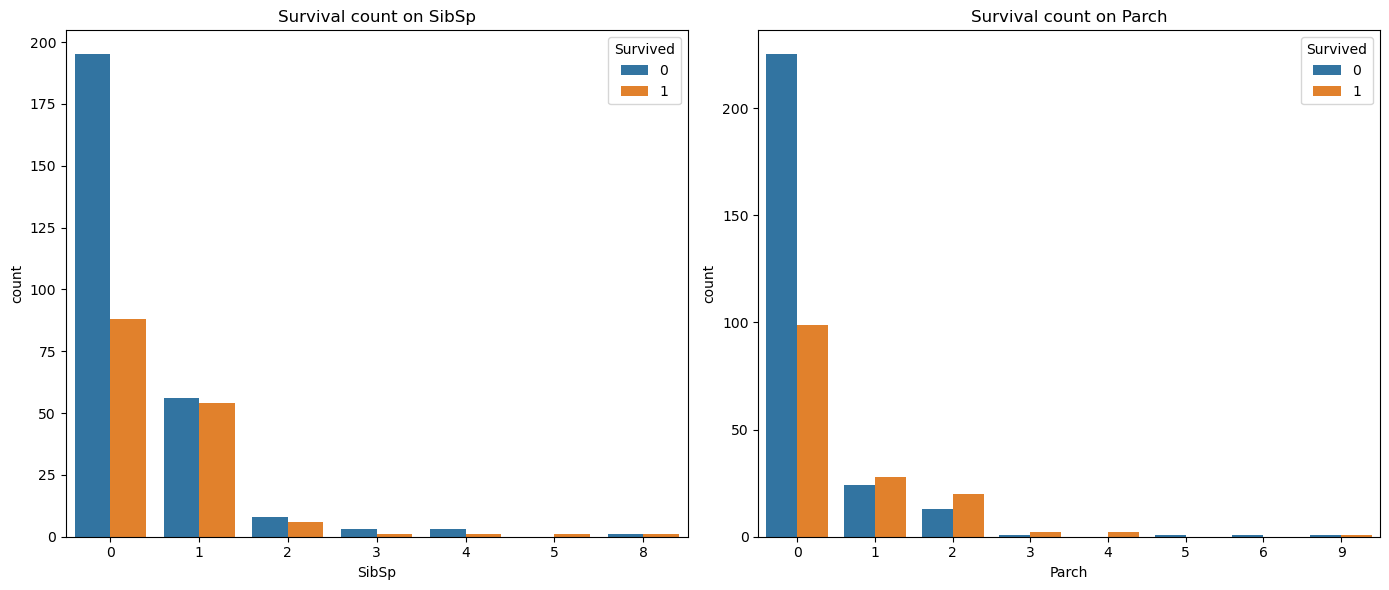

In [13]:
# Bar graphs showing survival count of SibSp and Parch

plt.figure(figsize=(14, 6))

# First subplot: Survival count by SibSp
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = "SibSp", hue = "Survived")
plt.title("Survival count on SibSp")

# Second subplot: Survival count by Parch
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = "Parch", hue = "Survived")
plt.title("Survival count on Parch")

plt.tight_layout()
plt.show()

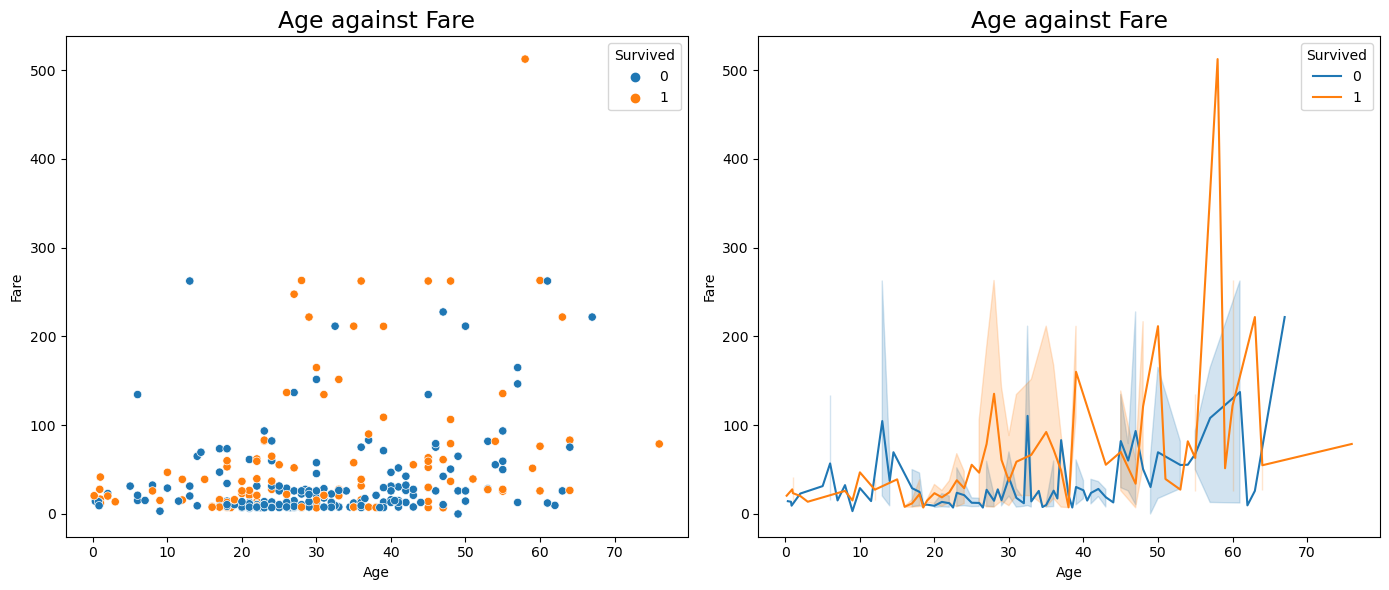

In [14]:
# Showing age against fare

plt.figure(figsize=(14, 6))

# First subplot: Age against fare scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Survived')
plt.title("Age against Fare", fontsize = 17)

# Second subplot: Age against fare line graph
plt.subplot(1, 2, 2)
sns.lineplot(data = df, x = 'Age', y = 'Fare', hue = 'Survived')
plt.title("Age against Fare", fontsize = 17)


plt.tight_layout()
plt.show()

# the plots show that people with high fare had a bit higher chance of survival

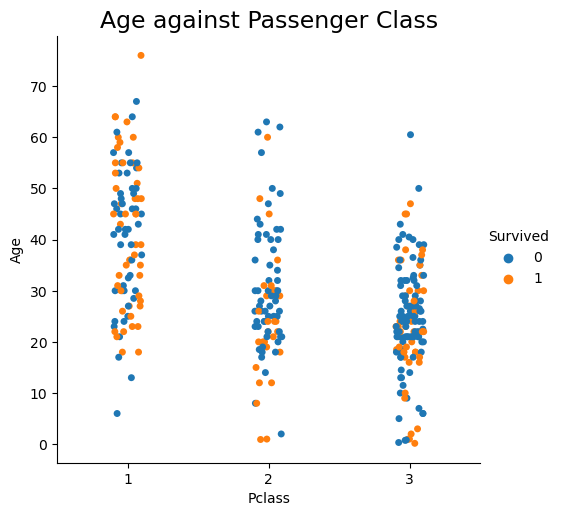

In [15]:
# Categorical Plot of Age against Pclass

sns.catplot(data = df, x = 'Pclass', y = 'Age', hue = 'Survived')
plt.title("Age against Passenger Class", fontsize = 17)

plt.show()

# The plot shows that people of passenger class 1 had higher chance of survival

# Data Preparation

In [16]:
# Checking for na values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
# handling the missing na values

df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

df = df.drop('Cabin', axis = 1)

In [18]:
# No na values

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# Displaying columns of dataset

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
# Taking only useful columns

new_df = df[['Survived', 'Pclass','Age', 'SibSp','Parch','Fare', 'Embarked']]

In [21]:
# Converting 'Embarked' column to numerical 

new_df = new_df.replace({'Embarked': {'S':0, 'C':1, 'Q': 2}})

In [22]:
# Checking for non numeric values

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# Prediction

In [23]:
# defining feature and target variables

x = new_df.drop(['Survived'], axis = 1)
y = new_df['Survived']

In [24]:
# splitting data into testing and training model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

### Decision Tree

In [25]:
# Decision tree model

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 2, max_depth = 10, min_samples_leaf = 2)

In [26]:
# Using model

tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=2)

In [28]:
# getting the accuracy

accuracy_tree = tree.score(x_test, y_test)
print("The accuracy is: " + str(accuracy_tree))

The accuracy is: 0.7142857142857143
